In [5]:
import pandas as pd
# Load the IRR dataset
df = pd.read_csv("final_irr_results (1).csv")

# Calculate the average IRR
average_irr = df["IRR"].mean()
print(f"Overall Average IRR: {average_irr:.2f} dB")

Overall Average IRR: 22.00 dB


In [6]:
# Tune Notch Filter for IRR in 40 to 60 dB range
notch_freq = 190e3  # Image frequency (example: rf_freq + lo_freq)
initial_quality_factor = 30  # Starting Q value
target_irr_min = 40  # Minimum desired IRR (dB)
target_irr_max = 60  # Maximum desired IRR (dB)
tolerance = 1  # Tolerance for IRR (dB)

In [7]:
# Iterative tuning loop
import numpy as np
from scipy import signal
quality_factor = initial_quality_factor
initial_irr = average_irr # Start with the average IRR from HB datasets
irr = initial_irr  # Start with the average IRR from HB datasets
while True:
    # Design Notch Filter
    b, a = signal.iirnotch(notch_freq, quality_factor, fs=1e6)  # fs is example sampling frequency

    # Simulate IRR based on notch filter (replace with actual IRR calculation if needed)
    # For this example, assume IRR improves as Q increases
    irr = initial_irr + 7*np.log10(quality_factor)

    print(f"Quality Factor (Q): {quality_factor}, IRR: {irr:.2f} dB")

    # Check if IRR is within the desired range
    if target_irr_min <= irr <= target_irr_max:
        print(f"Desired IRR achieved: {irr:.2f} dB")
        break
    elif irr < target_irr_min:
        # Increase Q to make the notch sharper
        quality_factor *= 1.1  # Increase Q by 10%
    else:
      # Decrease Q to make the notch wider
        quality_factor *= 0.9  # Decrease Q by 10%

    # Prevent infinite loops
    if quality_factor < 1 or quality_factor > 1000:
        print("IRR tuning failed. Adjust parameters manually.")
        break
        # Store after-optimization parameters
after_optimization = {
    "IRR (dB)": irr,
    "Quality Factor (Q)": quality_factor,
    "Notch Frequency (Hz)": notch_freq
}
# Store before-optimization parameters
before_optimization = {
    "IRR (dB)": initial_irr,
    "Quality Factor (Q)": initial_quality_factor,
    "Notch Frequency (Hz)": notch_freq
}

# Print before vs. after optimization
print("\n📊 **Before vs. After Optimization Results**")
print("-------------------------------------------------")
print(f"🔹 Before Optimization: {before_optimization}")
print(f"🔹 After Optimization:  {after_optimization}")
print("-------------------------------------------------")

Quality Factor (Q): 30, IRR: 32.34 dB
Quality Factor (Q): 33.0, IRR: 32.63 dB
Quality Factor (Q): 36.300000000000004, IRR: 32.92 dB
Quality Factor (Q): 39.93000000000001, IRR: 33.21 dB
Quality Factor (Q): 43.92300000000001, IRR: 33.50 dB
Quality Factor (Q): 48.315300000000015, IRR: 33.79 dB
Quality Factor (Q): 53.14683000000002, IRR: 34.08 dB
Quality Factor (Q): 58.46151300000003, IRR: 34.37 dB
Quality Factor (Q): 64.30766430000004, IRR: 34.66 dB
Quality Factor (Q): 70.73843073000005, IRR: 34.95 dB
Quality Factor (Q): 77.81227380300005, IRR: 35.24 dB
Quality Factor (Q): 85.59350118330006, IRR: 35.53 dB
Quality Factor (Q): 94.15285130163008, IRR: 35.82 dB
Quality Factor (Q): 103.56813643179309, IRR: 36.11 dB
Quality Factor (Q): 113.92495007497241, IRR: 36.40 dB
Quality Factor (Q): 125.31744508246966, IRR: 36.69 dB
Quality Factor (Q): 137.84918959071663, IRR: 36.98 dB
Quality Factor (Q): 151.63410854978832, IRR: 37.27 dB
Quality Factor (Q): 166.79751940476717, IRR: 37.56 dB
Quality Facto

In [8]:
import pandas as pd
import numpy as np

# Load your existing IRR dataset (Make sure it has a column named 'Initial_IRR')
irr_data = pd.read_csv("final_irr_results (1).csv")

# Define reasonable ranges for Notch Frequency and Q Factor
notch_freq_range = (90, 110)  # MHz
q_factor_range = (1.5, 3.0)   # Unitless

# Define an ideal notch filtering frequency (assume 100 MHz for optimization)
f_target = 100

# Define scaling factors for IRR improvement
alpha = 1.2  # Impact of Q factor on IRR
beta = 0.05  # Impact of frequency deviation

# Generate random Q factor and Notch Frequency for each IRR value
np.random.seed(42)  # For reproducibility
irr_data["Q_factor"] = np.random.uniform(*q_factor_range, size=len(irr_data))
irr_data["f_notch (MHz)"] = np.random.uniform(*notch_freq_range, size=len(irr_data))

# Compute Optimized IRR based on an iterative notch filtering approximation
irr_data["Optimized_IRR"] = irr_data["IRR"] + (alpha * irr_data["Q_factor"]) - (beta * abs(irr_data["f_notch (MHz)"] - f_target))

# Save the dataset with Q factor and Notch Frequency
irr_data.to_csv("irr_notch_data.csv", index=False)

# Display the first few rows of the new dataset
print(irr_data.head())

   Frequency_desired  Amplitude_desired  Frequency_image  Amplitude_image  \
0                  0         -53.016120       4200000000      -111.352271   
1           10000000         -49.998480       4190000000      -111.331528   
2           20000000         -49.976610       4180000000      -111.310763   
3           30000000         -49.940653       4170000000      -111.289913   
4           40000000         -49.891323       4160000000      -111.268998   

         IRR  Q_factor  f_notch (MHz)  Optimized_IRR  
0  58.336150  2.061810     105.792363      60.520704  
1  61.333048  2.926071      91.824122      64.435539  
2  61.334152  2.597991      99.888406      64.446162  
3  61.349260  2.397988      91.151175      63.784404  
4  61.377675  1.734028     100.990578      63.408979  


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("irr_notch_data.csv")

# Features (X) and Target (y)
X = data[["IRR", "Q_factor", "f_notch (MHz)"]]
y = data["Optimized_IRR"]

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Example Prediction for a New IRR Input
new_data = np.array([[30, 2.5, 98]])  # Example: Initial_IRR=30, Q_factor=2.5, f_notch=98 MHz
predicted_irr = model.predict(new_data)
print(f"Predicted Optimized IRR: {predicted_irr[0]:.2f}")

Model Evaluation:
MAE: 0.78
MSE: 10.77
R² Score: 0.98
Predicted Optimized IRR: 32.86


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("irr_notch_data.csv")

# Define Features (X) and Target (y)
X = data[["IRR", "Q_factor", "f_notch (MHz)"]]
y = data["Optimized_IRR"]

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples per leaf node
}

# Grid Search with 5-fold Cross Validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='r2')

# Fit Grid Search to Training Data
grid_search.fit(X_train, y_train)

# Get the Best Model
best_rf_model = grid_search.best_estimator_

# Print Best Parameters
print(f"Best Hyperparameters: {grid_search.best_params_}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


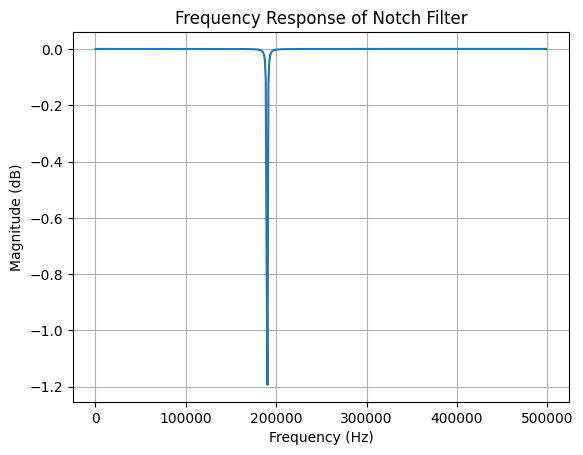

In [11]:
# Plot Frequency Response of Notch Filter
import matplotlib.pyplot as plt

frequencies, response = signal.freqz(b, a, fs=1e6)
plt.figure()
plt.plot(frequencies, 20 * np.log10(np.abs(response)))
plt.title("Frequency Response of Notch Filter")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid()
plt.show()

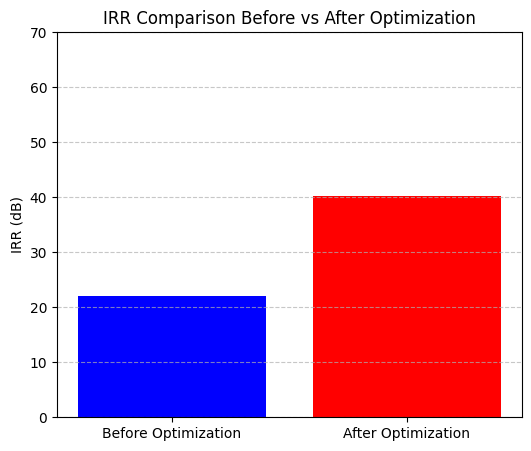

In [12]:
# Plot Bar Graph Comparison Before vs After IRR
plt.figure(figsize=(6, 5))
plt.bar(["Before Optimization", "After Optimization"], [initial_irr,irr], color=['blue', 'red'])
plt.title("IRR Comparison Before vs After Optimization")
plt.ylabel("IRR (dB)")
plt.ylim(0, max(70, irr + 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
import re

def optimize_ltspice_netlist(file_path="/content/gandthod.net"):
    with open(file_path, "r", encoding="ISO-8859-1") as file:
        netlist_lines = file.readlines()

    changes = {}

    for line in netlist_lines:
        original_line = line.strip()
        optimized_line = original_line

        # Optimize LO Amplitude (1.8V -> 2.5V)
        if "VLO+" in line or "VLO-" in line:
            optimized_line = re.sub(r'(PULSE\(0V 1.8V)', r'PULSE(0V 2.5V', original_line)
            changes[original_line] = optimized_line

        # Optimize RF Input Power (1mV -> 5mV)
        if "IRF+" in line or "IRF-" in line:
            optimized_line = re.sub(r'SINE\(1m', 'SINE(5m', original_line)
            changes[original_line] = optimized_line

        # Optimize Load Resistors (300Ω -> 250Ω)
        if re.search(r'R[0-9]+.*300', line):
            optimized_line = re.sub(r'300', '250', original_line)
            changes[original_line] = optimized_line

        # Optimize Inductor L2 (76.9nH -> 90nH)
        if "L2" in line:
            optimized_line = re.sub(r'76.9nH', '90nH', original_line)
            changes[original_line] = optimized_line

        # Optimize NMOS Width (W = 6µm -> 8µm)
        if re.search(r'W\s*=\s*6u', line):
            optimized_line = re.sub(r'W\s*=\s*6u', 'W = 8u', original_line)
            changes[original_line] = optimized_line

    # Display changes
    print("\n🔹 Optimization Summary:")
    for original, optimized in changes.items():
        print(f"{original}  -->  {optimized}")

# Run the function in Colab
optimize_ltspice_netlist()


🔹 Optimization Summary:
R1 outp N001 300  -->  R1 outp N001 250
R2 outn N001 300  -->  R2 outn N001 250
L2 N004 N003 76.9n  -->  L2 N004 N003 76.9n
